In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('out/experiment.csv')
print(data.shape)
data.head()

(7200, 10)


,game_id,treatment,cohort_id,round,player1_id,player2_id,player1_choice,player2_choice,player1_payout,player2_payout
0,1,0.6,1,1,137,276,R,B,0,42
1,2,0.6,1,1,261,176,B,B,12,12
2,3,0.6,1,1,202,209,R,R,45,45
3,4,0.6,1,1,111,254,B,B,12,12
4,5,0.6,1,2,254,276,R,B,0,42


In [3]:
treatments = data['treatment'].unique()
num_treatments = len(treatments)

averages = pd.DataFrame(index=range(1, 76), columns=treatments)
stds = pd.DataFrame(index=range(1, 76), columns=treatments)

In [4]:
for treatment in treatments:
	round_averages = []
	round_stds = []
	for round in range(1, 76):
		round_df = data.loc[(data['treatment'] == treatment) & (data['round'] == round), ['player1_payout', 'player2_payout']].reset_index(drop=True)
		round_averages.append(((round_df['player1_payout'] + round_df['player2_payout']) / 2).mean())
		round_stds.append(((round_df['player1_payout'] + round_df['player2_payout']) / 2).std())
	averages[treatment] = round_averages
	stds[treatment] = round_stds

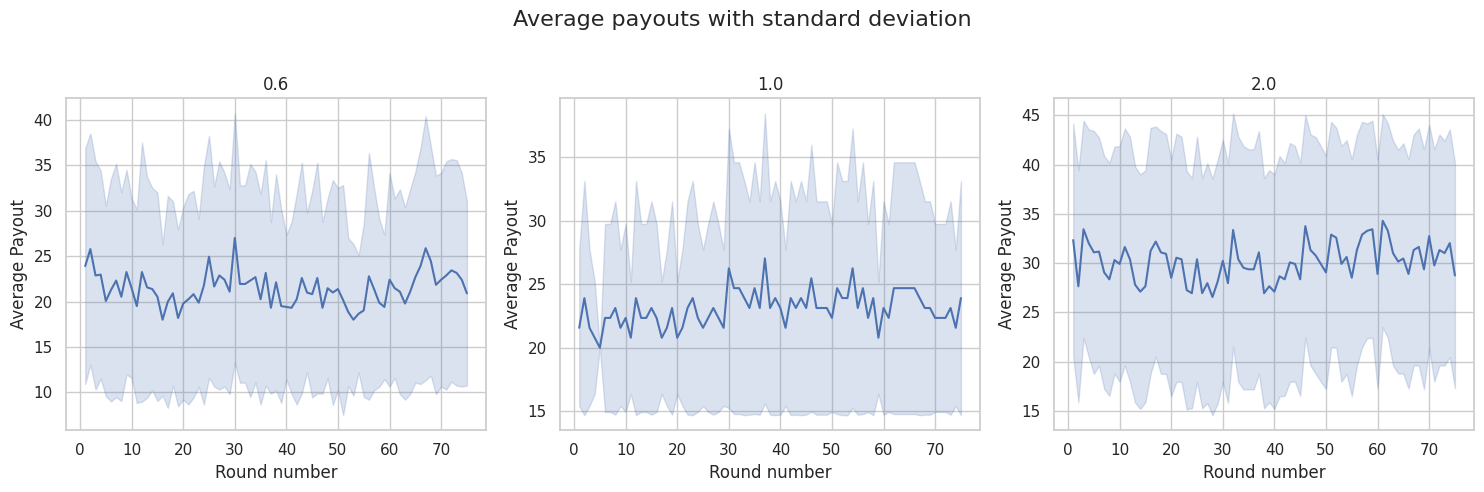

In [5]:

sns.set_theme(style="whitegrid")


n_cols = 3
n_rows = math.ceil(num_treatments / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()

for i, treatment in enumerate(treatments):
	mean_vals = averages[treatment]
	std_vals = stds[treatment]
	sns.lineplot(x=mean_vals.index, y=mean_vals, ax=axs[i])
	axs[i].fill_between(mean_vals.index, mean_vals - std_vals, mean_vals + std_vals, color='b', alpha=0.2)
	axs[i].set_title(treatment)
	axs[i].set_xlabel('Round number')
	axs[i].set_ylabel('Average Payout')

for j in range(len(treatments), len(axs)):
	fig.delaxes(axs[j])

fig.suptitle('Average payouts with standard deviation', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig(f'comparison_plot.pdf')
plt.show()
